# Programación para física computacional

## Sergio A. Alcalá Corona

### Daniel Rojo Mata, Rodrigo Vega Vilchis

En este notebook vamos a revisar/repasar lo que se vio en clase la semana del 21 Agosto. El objetivo de este notebook es presentar varios ejemplos todas las maneras útiles en las que podemos usar las estructuras de control para poder usarlas en las actividades y tareas futuras. De este notebook depende la gran mayoría del curso, pues estas son las herramientas principales para poder resolver problemas complejos de una manera eficiente. El contenido de este notebook principalmente ronda sobre 3 puntos

1. Condicionales
2. Bucles
3. Funciones

Los condicionales, bucles y funciones son una de las características universales de los lenguajes de progamación, cada uno posee su propia forma de escribirlos pero en esencia todos poseen la misma estructura y funcionalidad. 

Los condicionales se utilizan principalmente para que el progama tome una decisión con base en el flujo de trabajo que se le otorga; es una herramienta muy importante cuando se quieren generar progamas con multifuncionalidades. 

Los bucles como son el ciclo `for` o el `while` son la herramienta más poderosa para poder generar procesamientos de grandes cantidades de datos al antojo de uno mismo. En algún punto del curso veremos como la aplicación de estas herramientas enfocadas a matrices nos pueden generar la solución de una ecuación diferencial con derivadas parciales.

Las funciones que ya habíamos hablado un poco de ellas en el otro notebook, pueden contener condicionales y bucles en sus cuerpos, incluso se pueden generar módulos y encerrarlos en un paquete para armar todo un desarrollo masivo de funciones. Esto es más aplicable en python que en julia, puesto que python es un lenguaje orientado a objetos. Las librerías de numpy, pandas, Scipy etc, no son más que un enorme conjunto de módulos que contienen muchas funciones y que se mandan a llamar como lo han estado practicando en clase.
    

## Condicionales

Al igual que en python y en todo lenguaje de programación, se comparten los mismos operadores de comparación, sin embargo si hay una diferencia sutil con los operadores lógicos o booleanos, en Julia se pueden escribir como

* && reprensentando al "y"
* || representando al "o"

Fuera de esos cambios, en general se tienen los mismos operadores. Estos principalmente se usan en los condicionales, pues son las decisiones que tomará el programa con base en una entrada para arrojar un resultado. Ahora veamos algunos ejemplos de condicionales

In [1]:
#Sintaxis básica
println("Dame un natural del 1 al 10")
#Para leer lineas
a = readline()
#Para convertir de string a entero
a = parse(Int,a)


if a < 10
    print("Tu número es menor a 10")
elseif a >= 10
    print("Tu número es mayor o igual a 10")
else
    print("Error")
end

Dame un natural del 1 al 10
stdin> 5
Tu número es menor a 10

Si intentaron poner letras verán como arroja un error, es porque parse ya esta conviertiendo la entrada a valor entero por lo que es imposible que una palabra o caracter pueda convertirse a número. En este caso hay una ventana de oportunidad para mejorar el código y arreglar esas fallas, pero bueno vamos no es escrictamente necesario mientras nosootros sepamos como funciona.

Este es un ejemplo muy básico pero que nos sirve para conocer la sintaxis de escritura. Notemos como en julia se realiza automáticamente la identación de líneas de código, no es necesario el ":" de python, incluso también demarca el inicio y fin de sus procesos con un `end`. Más adelante iremos combinando cada de estos elementos para poder sacarle el máximo provecho a todo esto.

## Bucles. `while` y `for`

Existen varias maneras de emplear el ciclo for, se puede emplear de la manera usual: iterando una serie de valores dados hasta que termine la pila de valores o podemos generar listas por compresión usando las reglas del ciclo `for` veamos.

In [2]:
#Definamos una lista o array de números pares
pares = [i for i in 0:2:20]

11-element Vector{Int64}:
  0
  2
  4
  6
  8
 10
 12
 14
 16
 18
 20

La lógica de esta forma de escribir listas (que también funciona para python, pero solo para listas) es que definimos un conjunto sobre el cual se va a iterar un ciclo for, en este caso es el conjunto de los números $[0,20]$ con saltos de dos en dos. Pero esta misma lista la podemos obtener bajo otra lógica

In [3]:
pares1 = [2i for i in 0:10]

11-element Vector{Int64}:
  0
  2
  4
  6
  8
 10
 12
 14
 16
 18
 20

In [4]:
#Podemos verificar si son la misma lista
pares == pares1

true

Como vemos pueden haber muchas formas de llegar a un mismo resultado, solo depende del enfoque y razonamiento que se emplee. Yéndonos un paso adelante, veamos la sintaxis concreta del ciclo for

In [5]:
a = []
for i in 1:2:20
    push!(a,i)
end
a

10-element Vector{Any}:
  1
  3
  5
  7
  9
 11
 13
 15
 17
 19

En este ejemplo sencillo he definido una array/lista vacía, he definido mi variable de iteración que sera `i` y he definido que va a correr sobre el conjunto que va de 1 a 20 pero en saltos de dos en dos. La acción de este bucle es agregar a cada elemento del conjunto mencionado a esa lista vacía opr medio de la función `push!()` (equivalente al append de python). Es importante que tanto en Julia como Python definan sus listas afuera de los ciclos `for` o `while`, porque si no lo haces de esta forma, el programa no entiende correctamente hacia que lista va a meter esos elementos. Existe otra manera de hacer lo anterior pero con una técnica que se llama *prealocación*. Consiste en definir un vector de ceros de la longitud de lo que vayamos a querer y con eso podemos iterar y "meter" o más bien sustituir esos ceros por valores de nuestro interés.

In [6]:
#zeros() es una función que por default genera vectores de ceros con valores Float, si queremos cambiar el tipo
#hay que especificarlo
b = zeros(Int,10)
for i in 1:10
    b[i] = i*2-1
end
b

10-element Vector{Int64}:
  1
  3
  5
  7
  9
 11
 13
 15
 17
 19

Como vemos tenemos una lógica un poco diferente, en este caso vamos a iterar sobre el conjunto de 1 a 10 y notemos que en el cuerpo del ciclo for tenemos a la lista/array b mandadas a llamar desde su forma de índices. Aquí lo que observamos es que el ciclo for manda a llamar a cada una de las entradas de b que por default son cero, pero esas entradas son igualadas a un valor y se sustituye por ese valor. Este valor en concreto es cada uno de los valores del conjunto multiplicado por dos y restado uno que al final resultan en la misma lógica de números salteados de dos en dos hasta llegar al 19.

In [7]:
a==b

true

Dos maneras de pensar el problema pero al final llegamos al mismo resultado. Este tipo te estrategias o técnicas llegan a ser DEMASIADO últiles en Julia, al menos estas dos ténicas me hay ayudado a resolver una cantidad inmensa de problemas y no estoy tan seguro si sea aplicable a python, pero ya saben, mientras haya imaginación y buen razonamiento las cosas salen.

Mezclemos un poco de lo que tenemos hasta ahora

In [8]:
c = []
for i in 1:20
    if mod(i,2) != 0
        push!(c,i)
    else
        continue
    end
end
c

10-element Vector{Any}:
  1
  3
  5
  7
  9
 11
 13
 15
 17
 19

Una vez más llegamos al mismo resultado pero ahora usando condicionales y con la ayuda de la función módulo. La sentencia del condicional nos dice que si el número `i` cuyo módulo dos no sea cero (o sea impar) entonces metemos esos valores que si cumplen a la lista vacía c.

Pongamos atención en el `continue` del `else`, simplenete nos dice que continue con la siguiente iteración si es que el caso no se cumple, pero algo importante de aclarar es que al menos en Julia (creo que también en python) poner continues y breaks (para parar el flujo del bucle) solo funcionan dentro de un bucle, si los intentan poner en condicionales solitos les va arrojar un error. Para ese tipo de cosas hay otras herramientas (no se bien cuales XD pero las hay solo hay que buscarlas)

In [9]:
a==b==c

true

### While

Este tipo de bucle casi no lo ocupo personalmente, creo que el ciclo for por si solo se defiende bastante bien. El ciclo `while` podría usarse cuando no se tiene tanta certeza de donde parar el proceso, sin embargo, las condiciones de los ciclos for pueden cubrir una amplia varierdad de casos de forma que no se va a quedar corto. La ventaja que yo veo en los bucles `while` es que se pueden fusionar las esencias del ciclo for con los condicionales, el bucle `while`acepta una o más condiciones para poder seguir iterarando pero parará de iterar una vez que alguna de las condiciones se cumpla, veamos.

In [10]:
d = []
i=1
while i < 11 && true
    push!(d,i*2-1)
    i = i + 1
end
d    

10-element Vector{Any}:
  1
  3
  5
  7
  9
 11
 13
 15
 17
 19

In [11]:
a==b==c==d

true

No se me ocurrió alguna otra condición brillante más que poner `true`. Este tipo de ciclos servirá bien más adelante para hacer algorítmos que busquen raíces de ecuaciones trascendentales, ecuaciones cuya raíz no es trivial y necesita de métodos numéricos para poder encontrar dicha raíz. Como en particular no sabemos hasta cuando dejar de iterar, generaremos una condición que haga sentido y que sea adecuada para que haga ese proceso.

Hay algo importante de este tipo de bucles, siempre hay que inicializar la variable que esta iterando, debe definirse antes de que comience el bucle porque de otra forma éste no funcionará. También hay que darle un incremento para que el bucle no sea infinito y tenga espacio para poder parar en algún tiempo, ese incremento puede escribirse de dos maneras

* `i = i + 1`
* `i += 1`

Ambos son equivalentes y existen varias otras formas usando las otras operaciones `(*,-,/)`, pero no son tan usadas. Aún asi los invito a investigar sobre esas formas de operar sobre el iterador.  Asi mismo, no necesariamente debe ser un incremento de uno en uno, puede ser de la forma en la que mejor se acomode a sus necesidades. Pero si es muy importante que definan bien las condiciones y sus incrementos porque sino el bucle puede iterar de forma infinita y pues eso gasta RAM, pero se soluciona con inerrumpir el Kernel, aplica tanto en Julia como en Python. Veamos más ejemplos de este bucle con los que vieron en clase.

In [12]:
#La serie de fibbonacci. fn = fn-1 + fn-2
f1,f2 = 0, 1
fb = []
while f1 < 1000
    f1 = f2
    f2 = f1 + f2
    push!(fb,f1)
end
fb

11-element Vector{Any}:
    1
    2
    4
    8
   16
   32
   64
  128
  256
  512
 1024

In [13]:
#Números de Catlán.   c0 = 1, Cn+1 = Cn*(4n+2)/(n+2)
c0 = 1
c1 = 1
C = []
n = 0
while n < 11
    c0 = c1
    c1 = (4n+2)/(n+2)*c0
    push!(C,c1)
    n+=1
end
C 

11-element Vector{Any}:
     1.0
     2.0
     5.0
    14.0
    42.0
   132.0
   429.0
  1430.0
  4862.0
 16796.0
 58786.0

Uff se dispara rápido. Por ahí existe otra sucesión interesante que cumple la siguiente regla

$$
x_k =\begin{cases}
1 & \text{si } k=1 \\
\\
\frac{1}{2} \left( x_{k-1} +  \frac{s}{x_{k-1}} \right) & \text{si } k>1 \\
\end{cases}
$$

In [14]:
H = []
x1 = 1
s = 3
x2 = 2
k = 0
while k < 20
    x1 = x2 
    x2 = 0.5*(x1+s/x1)
    push!(H,x1)
    k+=1
end
H

20-element Vector{Any}:
 2
 1.75
 1.7321428571428572
 1.7320508100147274
 1.7320508075688772
 1.7320508075688772
 1.7320508075688772
 1.7320508075688772
 1.7320508075688772
 1.7320508075688772
 1.7320508075688772
 1.7320508075688772
 1.7320508075688772
 1.7320508075688772
 1.7320508075688772
 1.7320508075688772
 1.7320508075688772
 1.7320508075688772
 1.7320508075688772
 1.7320508075688772

Por último una ecuación que nos gusta mucho a los que impartimos este curso, tan simple pero a la vez tan compleja: La ecuación logística

$$
x_{n+1}=rx_n(1-x_n)
$$

In [15]:
x0 = 0.1
r = 3.46
x1 = r*x0*(1-x0)
n=0
L=[x0]
while n < 30
    x0 = x1
    x1 = r*x0*(1-x0)
    push!(L,x0)
    n+=1
end
L

31-element Vector{Float64}:
 0.1
 0.3114
 0.7419279384
 0.6624892192704792
 0.7736464975282107
 0.6059068765912786
 0.8261917178777517
 0.4968524126303459
 0.8649657207203763
 0.40412807853873484
 0.8331976683766245
 0.4808684257077982
 0.8637335807132528
 ⋮
 0.4735897125748791
 0.8625866386447038
 0.41011701598811917
 0.8370468301805153
 0.47194204255782346
 0.8622761185436386
 0.41089580820802607
 0.837529132797643
 0.470816332414534
 0.8620531648700631
 0.4114545700941953
 0.8378725856760749

In [16]:
#Recuerden instalar plots: import Pkg; Pkg.add("Plots")
using Plots
plotlyjs()

WebIO._IJuliaInit()

Plots.PlotlyJSBackend()

In [17]:
#Sigue pendiente el tutorial de gráficas. Hasta que comencemos en esos rollos le meto man de lleno.
#Pero la vdd esta versión de gráfica ya se defiende, solo que hay que explicar algunas cosas técnicas
plot(L,w=2,label="")
scatter!(L,label="",c="green")

El caos se asoma sutilmente... Con base en lo que se ha visto los invito a  intentar resolver el problema de las líneas de emisión de Hidrógeno.

$$
\frac{1}{\lambda}=R\left(\frac{1}{m^2}-\frac{1}{n^2}\right)
$$

## Funciones

Todo lo anterior podemos encapsularlo en funciones para que solamente las mandemos a llamar y no tengamos mucho código exparsido por ahí, podría verse como una maner a de optimizar espacio y código. Las funciones pueden contener ciclos `for`, `while` y condicionales; solamente basta con pasarle un conjunto de argumentos con los cuales se va a ir trabajando, en esencia esos argumentos deben ser las cantidades que queremos encontrar, por ejemplo la velocidad de una partícula, un sistema de ecuaciones diferenciales, etc.

### Problema  de relatividad

Imaginemos que existen dos observadores, uno en reposo y otro en movimiento a la mitad de un vagón de $26\, m$ de un tren moviéndose a $v=0.5\, c$. Cuando el tren en el mismo punto en donde coinciden ambos observadores, el observador en reposo ve que ambas luces parpadean al mismo tiempo. Encuentra la diferencia de tiempo en que las luces parpadean para el observador dentro del vagón

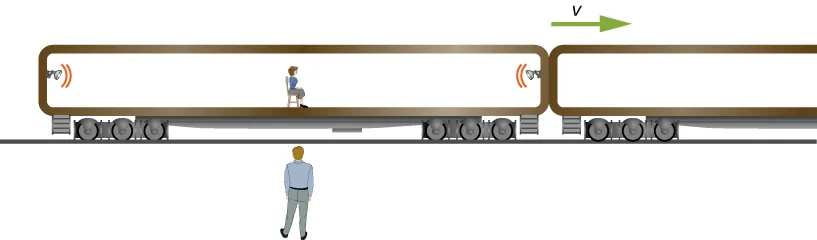

a) Primero tenemos que el observador en reposo ve el parpadeo simultáneo, por tanto $\Delta t=0$.

b) Nos piden obtener $\Delta \overline{t}=\overline{t}_2-\overline{t}_1$

c) ocupamos la transformación de lorentz inversa

\begin{align}
\Delta t&=\frac{\Delta\overline{t}+v\Delta\overline{x}}{\sqrt{1-v^2}}\\
0&=\frac{\Delta\overline{t}-0.5\cdot 26s}{\sqrt{1-0.5^2}}\\
\Delta\overline{t}&\approx-5\times 10^8\, s
\end{align}

El signo indica que el evento (el parpadeo) de la derecha ocurre que el destello de la izquierda, entonces $\overline{t}_2<\overline{t}_1$

In [18]:
#Ahora a programarlo
function pRelatividad(x::Int,v::Float64)
    dt_mov = (v*x/3E8)/sqrt(1-v^2)
    return dt_mov
end

pRelatividad (generic function with 1 method)

In [19]:
pRelatividad(26,0.5)

5.0037023329767566e-8

Veamos otros ejemplos de funciones, usando los ejemplos de `for`, `if` y `while`.

In [20]:
#Números impares hasta el 19
function impares(n::Int)
    c = []
    for i in 1:n
        if mod(i,2) != 0
            push!(c,i)
        else
            continue
        end
    end
    return c 
end

impares (generic function with 1 method)

In [21]:
impares(20)

10-element Vector{Any}:
  1
  3
  5
  7
  9
 11
 13
 15
 17
 19

Notemos que hace lo mismo, pero es un tanto más poderoso. Aquí puedo controlar rápidamente la cota superior del conjunto sin tener que estar manipulando tanto el ciclo `for` y los condicionales, puedo meter una cota superior de 200 y me regresará los números impares hasta el 200, esa es la ventaja y el poder de las funciones, poder atribuirles valores a los parámetros de los ciclos `for `para que la función tenga mayo alcance. Obvio que también pude haber hecho con el bucle `while` los pasos son los mismos. Mandar a llamar una función es más cómodo que tener un monton de ciclos, bucles y condicionales regados por el notebook. Si quisieramos llamar a archivos.jl  que contengan funciones que resuelvan algún caracter del problema que tenemos enfrente podemos mandarlo a llamar.

Primero que nada habría que crear un archivo con extensión .jl (este procedimiento sirve también para python, solo que su archivo sería con extensión .py). Hacen su archivo, comprueban que sus funciones sirvan correctamente y en python pueden importar como tal ese archivo con `from directorio_donde_se ecuentra import *`, o sino solo importando el puro archivo funciona (creo), pero en julia basta con ejecutar

`include(main.jl)`

`main.jl` sería el archivo de julia que quiero importar a mi notebook para poder usar todos sus atributos (funciones). En notebooks futuros trataré de ejemplificar esto pero por ahora dejémoslo así.

Un elemento extra, desde la terminal de julia es posible ejecutar `archivos.jl`, solo basta con mandar a llamar el archivo como en el notebook y usar las funciones, o ejecutar en terminal `julia archivo.jl`

### Un último ejemplo usando la ecuación logística

Para terminar quisiera mostrar una función que nos otorgue libertad de elección en las variables dentro de la ecuación logística. En este caso solo sería reciclar código y agregar unas cuantas líneas más


$$
x_{n+1}=rx_n(1-x_n)
$$

In [22]:
function logistica(x0,r,n)
"""En este caso:
    x0 = condición inicial
    r = tasa de crecimiento de la población
    n = número de pasos"""
    
    xn = zeros(n)
    #Condición inicial
    xn[1] = x0
    if r >= 4
        print("Escoge otra r")
    else
        for i in 2:n
            xn[i] = r*xn[i-1]*(1-xn[i-1])
        end
    end
    return xn
end

logistica (generic function with 1 method)

In [23]:
L1 = logistica(0.1,3.46,100)

100-element Vector{Float64}:
 0.1
 0.3114
 0.7419279384
 0.6624892192704792
 0.7736464975282107
 0.6059068765912786
 0.8261917178777517
 0.4968524126303459
 0.8649657207203763
 0.40412807853873484
 0.8331976683766245
 0.4808684257077982
 0.8637335807132528
 ⋮
 0.8613612679506869
 0.41318639772674864
 0.8389233586727823
 0.46755311103302344
 0.8613573099114218
 0.4131962952245891
 0.838929304256931
 0.4675391664370579
 0.8613541782240205
 0.4132041262649482
 0.8389340080068886
 0.467528134228697

In [24]:
plot(L1,w=2,label="")
scatter!(L1,label="",c="green")

Poseemos más poder en la forma de controlar la ecuación, ahora  `logistica(x0,r,n)` nos puede generar una gran variedad de resultados con tan solo introducir los argumentos adecuados. 

Con esta parte termina el 2capítulo de Julia, si existen dudas al respecto compártanlas para resolverlas y pues espero les haya servido el material para repasar y aprender un poco más de este lenguaje.